# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Exploration Corpus Hybrinfox
- SpuWiGo est en format doc, inutilisable
- Les résultats bruts sont difficiles à traiter
- Travail pour l'instant sur OuLiMon + SoBreVol

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import importlib
import pandas as pd
import seaborn as sns

In [4]:
from tqdm.notebook import tqdm
tqdm.pandas()

# Experience
---

## Récupération données

### Oulimon

In [5]:
df_lemonde = pd.read_excel('data/Corpus_VAGO/Corpus OuLiMon (régulier)/Résultats_LeMonde.xlsx')

In [6]:
df_libe = pd.read_excel('data/Corpus_VAGO/Corpus OuLiMon (régulier)/Résultats_Libération.xlsx')

In [7]:
df_of = pd.read_excel('data/Corpus_VAGO/Corpus OuLiMon (régulier)/Résultats_OuestFrance.xlsx')

In [26]:
df_oulimon = pd.concat([df_lemonde,df_libe,df_of],ignore_index=True)

In [9]:
df_oulimon.iloc[3]['Resultats bruts']

'"document": { "vagueSentencesCounter": "12", "opinionSentencesCounter": "8", "otherSentencesCounter": "6", "totalSentencesCounter": "18", "totalDocVC": "9", "totalDocVG": "14", "totalDocVA": "2", "totalDocVD": "1", "preciseSentencesCounter": "6", "meanRatioPV": "0.1691919191919192", "meanRatioPrecis": "0.019413909350970242", "meanRatioVague": "0.6666666666666666", "meanRatioOpinion": "0.4444444444444444"'

### SoBreVol

In [12]:
df_vol = pd.read_csv('data/Corpus_VAGO/Corpus SoBreVol (complotiste)/Résultats_BoulevardVoltaire.csv')

In [13]:
df_bre = pd.read_csv('data/Corpus_VAGO/Corpus SoBreVol (complotiste)/Résultats_BreizhInfo.csv')

In [14]:
df_so = pd.read_csv('data/Corpus_VAGO/Corpus SoBreVol (complotiste)/Résultats_FranceSoir.csv')

In [27]:
df_sobrevol = pd.concat([df_so,df_bre,df_vol],ignore_index=True)

In [17]:
df_sobrevol.describe()

,Nb_phrase_CAM,meanratiopv,meanratiovague,meanratioopinion,Nb_phrase_pre
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,38.587500,0.202208,0.610109,0.488401,13.500000
std,27.493032,0.088087,0.123400,0.129055,8.312414
min,10.000000,0.026337,0.307692,0.222222,2.000000
25%,25.000000,0.144497,0.519630,0.392857,9.000000
50%,30.000000,0.195381,0.600000,0.479130,12.000000
75%,39.000000,0.251230,0.692308,0.571429,15.000000
max,196.000000,0.681818,0.956522,0.869565,56.000000


In [28]:
df_hybrinfox = pd.concat([df_oulimon,df_sobrevol],ignore_index=True)

In [29]:
df_hybrinfox

,Source,Type,Titre,Description,URL,Contenu,Unnamed: 6,Resultats bruts,Nb_phrase_CAM,meanratiopv,meanratiovague,meanratioopinion,Nb_phrase_pre
0,LeMonde,Actualités,La CGT devance FO et la CFDT dans la fonction ...,"Les élections professionnelles, du 1er au 8 dé...",https://www.lemonde.fr/politique/article/2022/...,La CGT devance FO et la CFDT dans la fonction ...,NaN,"""document"": { ""vagueSentencesCounter"": ""11"", ""...",19,0.226316,0.578947,0.421053,20.0
1,LeMonde,Actualités,"A Paris, les tiers-lieux permettent aux artist...",L’ouverture d’une friche culturelle baptisée C...,https://www.lemonde.fr/culture/article/2022/12...,"A Paris, les tiers-lieux permettent aux artist...",NaN,"document"": { ""vagueSentencesCounter"": ""10"", ""o...",18,0.200337,0.555556,0.388889,20.0
2,LeMonde,Actualités,« L’organisation de La France insoumise permet...,Les critiques internes sur le « verrouillage »...,https://www.lemonde.fr/politique/article/2022/...,« L’organisation de La France insoumise permet...,NaN,"document"": { ""vagueSentencesCounter"": ""11"", ""o...",17,0.279412,0.647059,0.470588,20.0
3,LeMonde,Actualités,Les grandes lignes de la future loi de program...,Emmanuel Macron s’apprête à rendre des arbitra...,https://www.lemonde.fr/politique/article/2022/...,Les grandes lignes de la future loi de program...,NaN,"""document"": { ""vagueSentencesCounter"": ""12"", ""...",18,0.169192,0.666667,0.444444,20.0
4,LeMonde,Actualités,"Denys Chmyhal, premier ministre ukrainien : « ...",Le dirigeant était à Paris à l’occasion de deu...,https://www.lemonde.fr/international/article/2...,"Denys Chmyhal, premier ministre ukrainien : « ...",NaN,"document"": { ""vagueSentencesCounter"": ""12"", ""o...",17,0.331232,0.705882,0.647059,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Boulevard Voltaire,Idées,"Praud, Kelly, Hanouna, une « bande de racaille...",NaN,https://www.bvoltaire.fr/praud-kelly-hanouna-u...,Connaissez-vous la revue Politis ? Si ce n’est...,NaN,"document"": { ""vagueSentencesCounter"": ""15"", ""o...",30,0.190278,0.500000,0.400000,10.0
356,Boulevard Voltaire,Idées,"Sous la pression, le maire qui avait déboulonn...",NaN,https://www.bvoltaire.fr/sous-la-pression-le-m...,"Le coup aurait pu passer inaperçu, dans ce pet...",NaN,"document"": { ""vagueSentencesCounter"": ""18"", ""o...",30,0.216111,0.600000,0.466667,12.0
357,Boulevard Voltaire,Idées,Darmanin et l'affaire du chat de Montparnasse ...,NaN,https://www.bvoltaire.fr/darmanin-et-laffaire-...,"Chacun sa cause. Par exemple, jadis, lorsqu’on...",NaN,"document"": { ""vagueSentencesCounter"": ""17"", ""o...",34,0.097829,0.500000,0.441176,8.0
358,Boulevard Voltaire,Idées,"L’agriculture, en France (I) : « Je t’aime moi...",NaN,https://www.bvoltaire.fr/tribune-lagriculture-...,"Le 2 novembre 2017, quelques mois après son él...",NaN,"document"": { ""vagueSentencesCounter"": ""26"", ""o...",39,0.251085,0.666667,0.538462,18.0


In [45]:
df_hybrinfox = df_hybrinfox[df_hybrinfox['Contenu'].notna()]

## Prédiction Infox

In [46]:
import patat.util.file

In [52]:
predictor = patat.util.file.pickle_load('data/prod/230425-MLPCInfox.pickle')

In [62]:
df_hybrinfox['Infox'] = predictor.predict(df_hybrinfox['Contenu'])

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_8078/3674215401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hybrinfox['Infox'] = predictor.predict(df_hybrinfox['Contenu'])


In [54]:
df_hybrinfox['MLPC_Infox'] = predictor.predict_proba(df_hybrinfox['Contenu'])[:, 1]

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_8078/2519030210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hybrinfox['MLPC_Infox'] = predictor.predict_proba(df_hybrinfox['Contenu'])[:, 1]


In [65]:
df_hybrinfox[df_hybrinfox['Infox']==1].value_counts('Source')

Source
FranceSoir            31
BreizhInfo            16
Boulevard Voltaire    13
Libération             6
OuestFrance            4
LeMonde                3
dtype: int64

LeMonde
Libération
OuestFrance
FranceSoir
BreizhInfo
Boulevard Voltaire


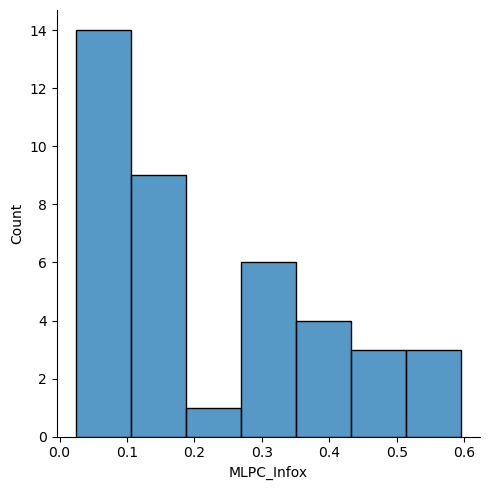

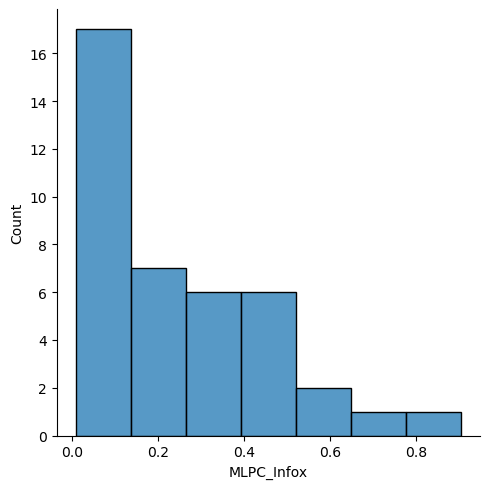

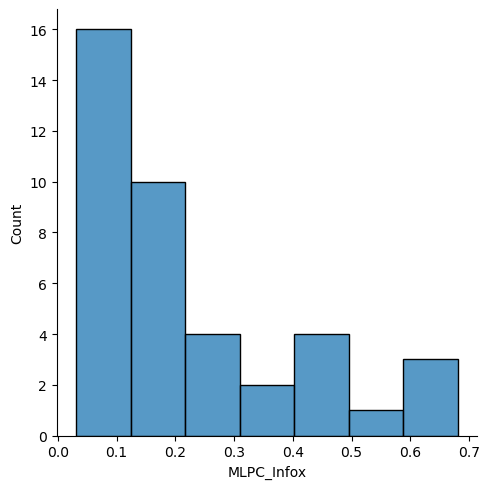

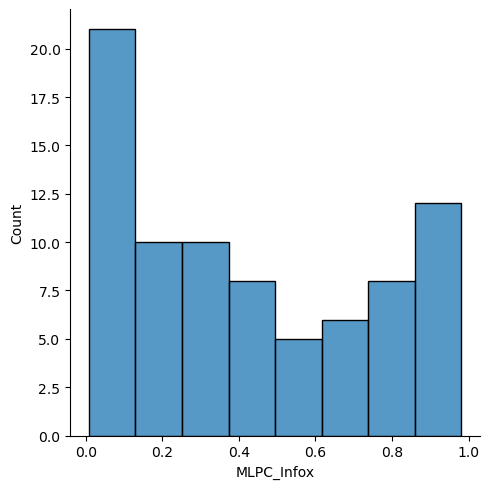

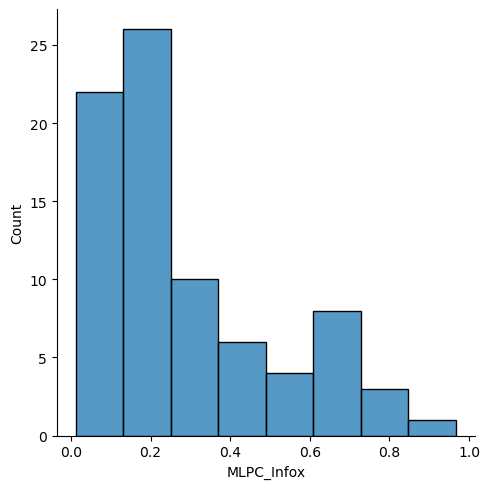

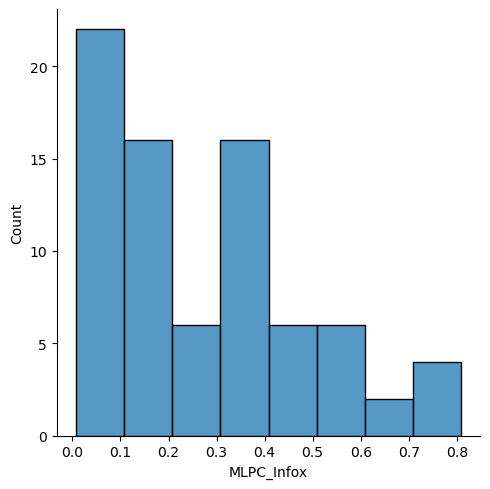

In [59]:
for source in df_hybrinfox['Source'].unique():
    sns.displot(df_hybrinfox[df_hybrinfox['Source']==source],x='MLPC_Infox')
    print(source)

In [60]:
df_hybrinfox['Infox']=

,Unnamed: 6,Nb_phrase_CAM,meanratiopv,meanratiovague,meanratioopinion,Nb_phrase_pre,MLPC_Infox
count,0.0,358.000000,358.000000,358.000000,358.000000,318.000000,358.000000
mean,NaN,33.759777,0.217618,0.601557,0.475251,17.179245,0.297855
std,NaN,23.789774,0.091601,0.121661,0.126880,9.986866,0.252130
min,NaN,10.000000,0.017857,0.263158,0.157895,2.000000,0.007975
25%,NaN,22.000000,0.152108,0.520000,0.385684,10.000000,0.096668
50%,NaN,28.000000,0.216276,0.593171,0.458896,13.500000,0.218432
75%,NaN,35.000000,0.275681,0.681818,0.555556,23.000000,0.435605
max,NaN,196.000000,0.681818,0.956522,0.869565,56.000000,0.981278


### Parsing SoBreVol

In [70]:
from patat.imp import selectors
from patat.imp.importer import Importer
from patat.imp.parser import Parser
imp = Importer()
parser = Parser()

In [71]:
def parse(url):
#    print(url)
    site = imp.get_site(url)
    html = imp.get_webpage(url)
    parse_data = parser.parse_article(url,html,site)
    return parse_data

In [72]:
parse_data = df_sobrevol['URL'].progress_apply(parse)

  0%|          | 0/240 [00:00<?, ?it/s]

In [82]:
list(parse_data)

[{'url': 'https://www.francesoir.fr/societe/panne-d-internet-musk-propose-son-aide-l-italie',
  'site': 'www.francesoir.fr',
  'title': "Panne d'internet : Musk propose son aide à l'Italie",
  'article': "Une vaste panne informatique due à « un problème de connexion international » a été signalée dimanche 5 février par l’Italie. L’agence nationale de la cybersécurité transalpine (ACN) a invité les autres organisations à « prendre des mesures pour protéger leurs systèmes\u202f». Elon Musk en profite pour faire la promotion de Starlink, son service internet par satellite, qui est disponible «\u202fcomme source principale ou de secours\u202fde connexion à internet\u202f», au besoin.  \nAprès la panne mondiale qui a frappé les serveurs de la plateforme de streaming Netflix le mercredi 1er février 2023, c’était dimanche au tour de l’Italie de faire face à «\u202fun problème de connexion international\u202f», selon Telecom italia (TIM). L'occasion pour Elon Musk, après avoir pris connaissanc

In [85]:
df_parse = pd.DataFrame(list(parse_data))

In [87]:
df_sobrevol2 = df_sobrevol.merge(df_parse.rename(columns={'url':'URL'}))

,Source,Type,Titre,URL,Contenu,Resultats bruts,Nb_phrase_CAM,meanratiopv,meanratiovague,meanratioopinion,Nb_phrase_pre,site,title,article,author,date,tags,paragraphs,abstract,date_iso


# Mesure et observation des résultats
---

# Sauvegarde
---

In [91]:
df_sobrevol2.to_csv('data/Corpus_VAGO/sobrevol.csv')

In [92]:
df_oulimon.to_csv('data/Corpus_VAGO/oulimon.csv')

# Conclusions
---

- ...

# Bricolages
---

In [6]:
!conda install openpyxl -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniforge/base/envs/p311

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    et_xmlfile-1.1.0           |     pyhd8ed1ab_0          10 KB  conda-forge
    openpyxl-3.1.2             |  py311heffc1b2_0         648 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         659 KB

The following NEW packages will be INSTALLED:

  et_xmlfile         conda-forge/noarch::et_xmlfile-1.1.0-pyhd8ed1ab_